<a href="https://colab.research.google.com/github/NadhaIrshad/In22-S5-EN3150---Pattern-Recognition/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

### Question 4

In [32]:
pip install group-lasso


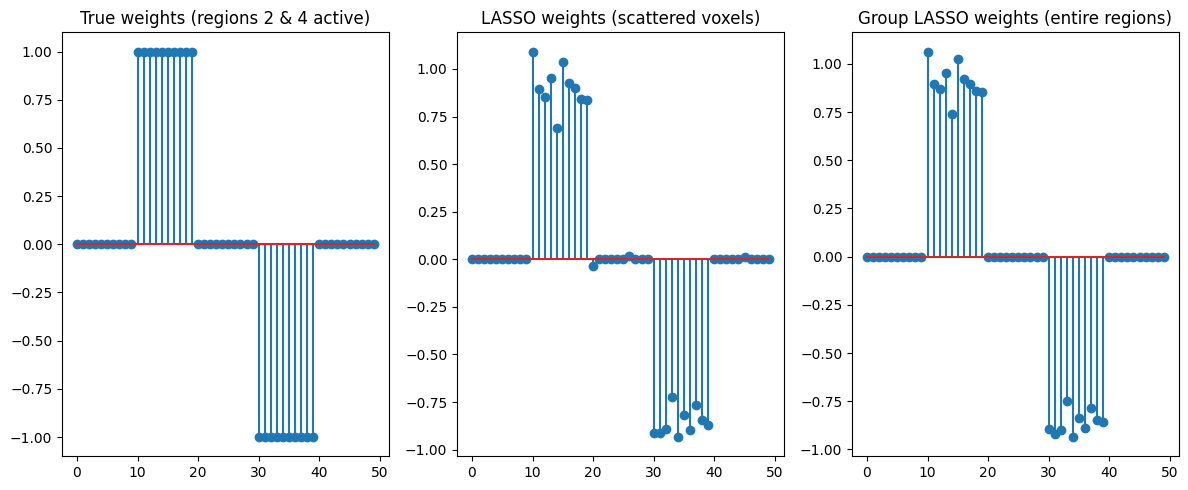

In [33]:
import numpy as np
from sklearn.linear_model import Lasso
from group_lasso import GroupLasso
import matplotlib.pyplot as plt

# -----------------------
# Step 1: Simulate Data
# -----------------------
np.random.seed(42)

n_samples = 100
n_voxels_per_region = 10
n_regions = 5
n_features = n_voxels_per_region * n_regions

# Group structure: region IDs for each voxel
groups = np.repeat(np.arange(n_regions), n_voxels_per_region)

# True weights: only region 2 and 4 are predictive
true_w = np.zeros(n_features)
true_w[10:20] = 1.0   # region 2
true_w[30:40] = -1.0  # region 4

# Generate predictors (correlated voxels per region)
X = np.random.randn(n_samples, n_features)
y = X @ true_w + 0.5 * np.random.randn(n_samples)

# Step 2: Fit Standard LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso_w = lasso.coef_

# Step 3: Fit Group LASSO
gl = GroupLasso(
    groups=groups,
    group_reg=0.05,
    l1_reg=0,  # pure group lasso
    scale_reg="group_size",
    supress_warning=True,
    n_iter=1000
)
gl.fit(X, y)
gl_w = gl.coef_

# -----------------------
# Step 4: Plot results
# -----------------------
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.stem(true_w)
plt.title("True weights (regions 2 & 4 active)")

plt.subplot(1,3,2)
plt.stem(lasso_w)
plt.title("LASSO weights (scattered voxels)")

plt.subplot(1,3,3)
plt.stem(gl_w)
plt.title("Group LASSO weights (entire regions)")

plt.tight_layout()
plt.show()


# Logistic Regression

In [34]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [35]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
print("Dataset shape:", df.shape)
df

Dataset shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [36]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


In [37]:
print(df.describe())


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [38]:
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())


['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['Male' 'Female' nan]


In [39]:
print(df.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [40]:
df.dropna(inplace=True)
print("Dataset shape:", df.shape)
df

Dataset shape: (333, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [41]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable
X = df_filtered.drop(['class_encoded'], axis=1)


       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


ValueError: could not convert string to float: 'Adelie'

In [43]:
# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()

# Initialize the LabelEncoder for target
le = LabelEncoder()

# Encode the species column (target variable)
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[['species', 'class_encoded']])

# Split the data into features (X) and target variable (y)
y = df_filtered['class_encoded']  # Target variable

# Drop target and original species column from features
X = df_filtered.drop(['class_encoded', 'species'], axis=1)

# One-hot encode categorical variables (island, sex)
X = pd.get_dummies(X, drop_first=True)


       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 0.5813953488372093
Coefficients: [[ 2.75654867e-03 -8.29052095e-05  4.60646447e-04 -2.86437876e-04
   1.85208010e-04 -1.05138770e-04  1.04918880e-05]]
Intercept: [-8.52911848e-06]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Train the logistic regression model.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)


Accuracy: 1.0
Coefficients: [[ 1.51524391 -1.39159923 -0.14412226 -0.00365548  0.73456625 -0.56189725
  -0.22642575]]
Intercept: [-0.07740379]


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# List of random states to test
random_states = [0, 10, 42, 100, 200]

# Store results
results = []

for state in random_states:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=state)
    # Train model
    logreg = LogisticRegression(solver='saga', max_iter=5000)
    logreg.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = logreg.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((state, acc))

# Print results
for state, acc in results:
    print(f"Random state {state} → Accuracy: {acc:.3f}")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Random state 0 → Accuracy: 0.767
Random state 10 → Accuracy: 0.767
Random state 42 → Accuracy: 0.721
Random state 100 → Accuracy: 0.884
Random state 200 → Accuracy: 0.814


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [47]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Saga solver (scaled)
logreg_saga = LogisticRegression(solver='saga', max_iter=5000)
logreg_saga.fit(X_train_scaled, y_train)
y_pred_saga = logreg_saga.predict(X_test_scaled)
accuracy_saga = accuracy_score(y_test, y_pred_saga)

# Liblinear solver (scaled)
logreg_liblinear = LogisticRegression(solver='liblinear')
logreg_liblinear.fit(X_train_scaled, y_train)
y_pred_liblinear = logreg_liblinear.predict(X_test_scaled)
accuracy_liblinear = accuracy_score(y_test, y_pred_liblinear)

print("Saga Accuracy (scaled):", accuracy_saga)
print("Liblinear Accuracy (scaled):", accuracy_liblinear)


Saga Accuracy (scaled): 1.0
Liblinear Accuracy (scaled): 0.9767441860465116


In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Sample categorical feature
data = ['red', 'blue', 'green', 'blue', 'green']
df = pd.DataFrame({'color': data})

# Label Encoding
le = LabelEncoder()
df['color_encoded'] = le.fit_transform(df['color'])
print("Label Encoded:")
print(df)

# Apply scaling
scaler = StandardScaler()
df['color_scaled'] = scaler.fit_transform(df[['color_encoded']])
print("\nScaled Label Encoded Feature:")
print(df)


Label Encoded:
   color  color_encoded
0    red              2
1   blue              0
2  green              1
3   blue              0
4  green              1

Scaled Label Encoded Feature:
   color  color_encoded  color_scaled
0    red              2      1.603567
1   blue              0     -1.069045
2  green              1      0.267261
3   blue              0     -1.069045
4  green              1      0.267261


In [50]:
# One-hot encoding
df_onehot = pd.get_dummies(df['color'], drop_first=False)
print("\nOne-Hot Encoded Feature:")
print(df_onehot)



One-Hot Encoded Feature:
    blue  green    red
0  False  False   True
1   True  False  False
2  False   True  False
3   True  False  False
4  False   True  False


# Logistic regression First/Second-Order Methods

In [55]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs
# Generate synthetic data
np.random.seed (0) #results are reproducible.
centers = [[ -5 , 0] , [5 , 1.5]]
X , y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]] #stretch, rotate, and skew the clusters.
X = np . dot (X , transformation ) #The transformation makes the dataset more realistic by introducing correlation between features and skewing the clusters.

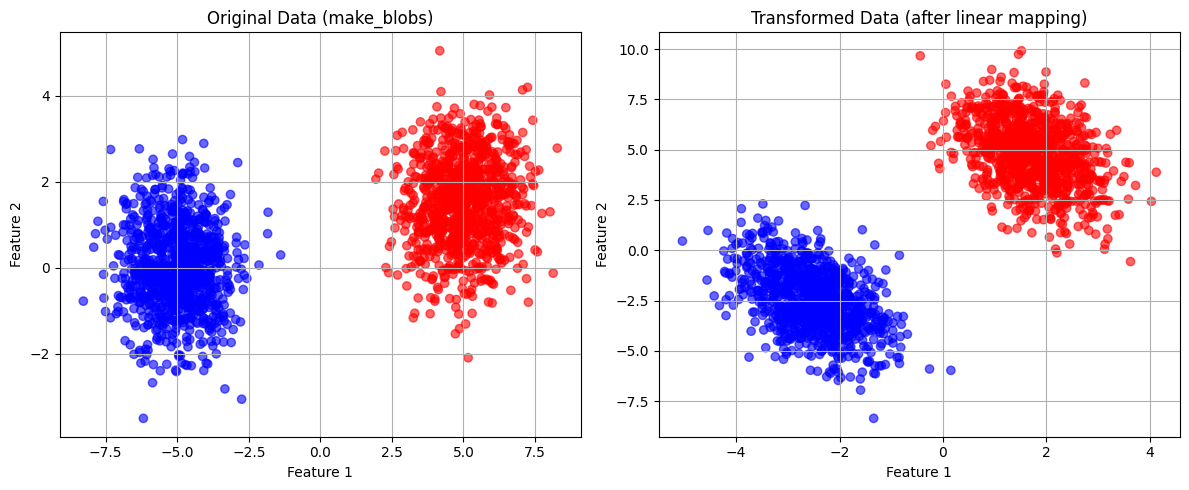

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate original blob data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Step 2: Define transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]

# Step 3: Apply transformation
X_transformed = np.dot(X, transformation)

# Step 4: Plot original vs transformed
plt.figure(figsize=(12,5))

# Original data
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.6)
plt.title("Original Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# Transformed data
plt.subplot(1,2,2)
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y, cmap='bwr', alpha=0.6)
plt.title("Transformed Data (after linear mapping)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()


In [53]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [54]:
def compute_loss(y, y_pred): # Binary Cross-Entropy Loss
    epsilon = 1e-10  # to avoid log(0)
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))


Iteration 1: Loss = 0.6904
Iteration 2: Loss = 0.3539
Iteration 3: Loss = 0.2438
Iteration 4: Loss = 0.1896
Iteration 5: Loss = 0.1568
Iteration 6: Loss = 0.1346
Iteration 7: Loss = 0.1183
Iteration 8: Loss = 0.1059
Iteration 9: Loss = 0.0961
Iteration 10: Loss = 0.0881
Iteration 11: Loss = 0.0814
Iteration 12: Loss = 0.0758
Iteration 13: Loss = 0.0710
Iteration 14: Loss = 0.0668
Iteration 15: Loss = 0.0631
Iteration 16: Loss = 0.0598
Iteration 17: Loss = 0.0569
Iteration 18: Loss = 0.0542
Iteration 19: Loss = 0.0519
Iteration 20: Loss = 0.0497

Final Weights: [0.54512386 0.66250114]


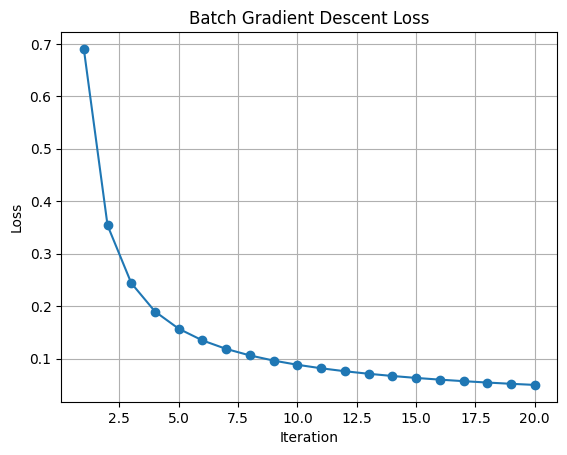

In [56]:
# 3. Initialize weights
np.random.seed(42)
weights = np.random.randn(X.shape[1]) * 0.01   # small random initialization

# 4. Batch Gradient Descent
learning_rate = 0.1
num_iterations = 20
losses = []

for i in range(num_iterations):
    # Linear combination
    z = np.dot(X, weights)
    y_pred = sigmoid(z)

    # Gradient calculation
    gradient = np.dot(X.T, (y_pred - y)) / y.size

    # Weight update
    weights -= learning_rate * gradient

    # Compute loss
    loss = compute_loss(y, y_pred)
    losses.append(loss)

    print(f"Iteration {i+1}: Loss = {loss:.4f}")

print("\nFinal Weights:", weights)


# 5. Plot loss vs iterations
plt.plot(range(1, num_iterations+1), losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Batch Gradient Descent Loss")
plt.grid(True)
plt.show()

In [60]:
import numpy as np
import matplotlib . pyplot as plt
import numpy as np
from sklearn . datasets import make_blobs
# Generate synthetic data
np.random.seed (0)
centers = [[ 2 , 2] , [5 , 1.5]]
X , y = make_blobs ( n_samples =2000 , centers = centers , random_state =5)
transformation = [[0.5 , 0.5] , [ -0.5 , 1.5]]
X = np . dot (X , transformation )

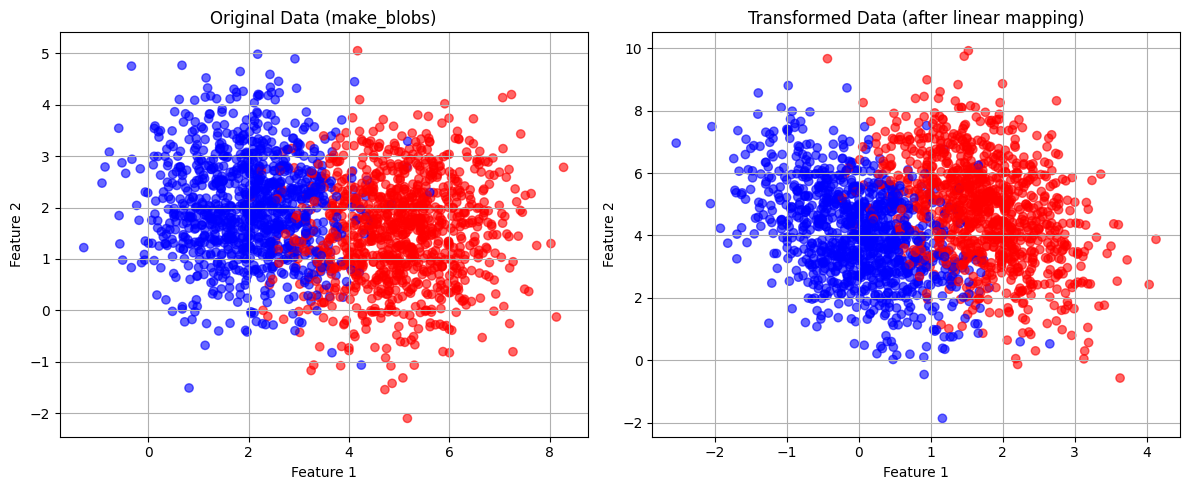

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Step 1: Generate original blob data
np.random.seed(0)
centers = [[2, 2], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Step 2: Define transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]

# Step 3: Apply transformation
X_transformed = np.dot(X, transformation)

# Step 4: Plot original vs transformed
plt.figure(figsize=(12,5))

# Original data
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.6)
plt.title("Original Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

# Transformed data
plt.subplot(1,2,2)
plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y, cmap='bwr', alpha=0.6)
plt.title("Transformed Data (after linear mapping)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)

plt.tight_layout()
plt.show()


Iteration 1: Loss = 0.6893
Iteration 2: Loss = 0.6434
Iteration 3: Loss = 0.6194
Iteration 4: Loss = 0.6029
Iteration 5: Loss = 0.5893
Iteration 6: Loss = 0.5773
Iteration 7: Loss = 0.5665
Iteration 8: Loss = 0.5565
Iteration 9: Loss = 0.5472
Iteration 10: Loss = 0.5387
Iteration 11: Loss = 0.5307
Iteration 12: Loss = 0.5233
Iteration 13: Loss = 0.5165
Iteration 14: Loss = 0.5100
Iteration 15: Loss = 0.5040
Iteration 16: Loss = 0.4984
Iteration 17: Loss = 0.4932
Iteration 18: Loss = 0.4882
Iteration 19: Loss = 0.4836
Iteration 20: Loss = 0.4792

Final Weights: [ 0.37995385 -0.46651819]


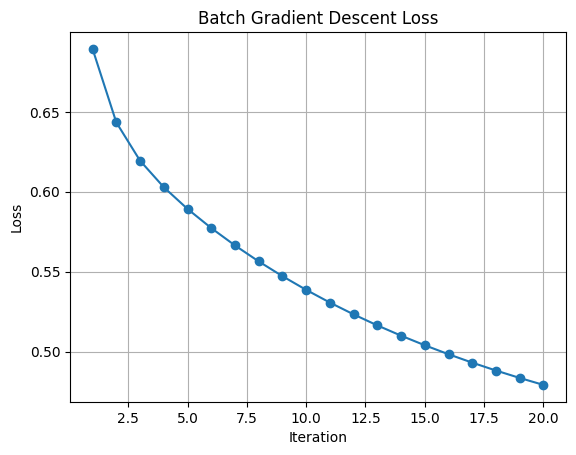

In [62]:
# 3. Initialize weights
np.random.seed(42)
weights = np.random.randn(X.shape[1]) * 0.01   # small random initialization

# 4. Batch Gradient Descent
learning_rate = 0.1
num_iterations = 20
losses = []

for i in range(num_iterations):
    # Linear combination
    z = np.dot(X, weights)
    y_pred = sigmoid(z)

    # Gradient calculation
    gradient = np.dot(X.T, (y_pred - y)) / y.size

    # Weight update
    weights -= learning_rate * gradient

    # Compute loss
    loss = compute_loss(y, y_pred)
    losses.append(loss)

    print(f"Iteration {i+1}: Loss = {loss:.4f}")

print("\nFinal Weights:", weights)


# 5. Plot loss vs iterations
plt.plot(range(1, num_iterations+1), losses, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Batch Gradient Descent Loss")
plt.grid(True)
plt.show()

Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.3553
Iteration 3: Loss = 0.2447
Iteration 4: Loss = 0.1901
Iteration 5: Loss = 0.1570
Iteration 6: Loss = 0.1345
Iteration 7: Loss = 0.1182
Iteration 8: Loss = 0.1057
Iteration 9: Loss = 0.0958
Iteration 10: Loss = 0.0877
Iteration 11: Loss = 0.0810
Iteration 12: Loss = 0.0753
Iteration 13: Loss = 0.0704
Iteration 14: Loss = 0.0662
Iteration 15: Loss = 0.0625
Iteration 16: Loss = 0.0592
Iteration 17: Loss = 0.0563
Iteration 18: Loss = 0.0536
Iteration 19: Loss = 0.0513
Iteration 20: Loss = 0.0491
Iteration 1: Loss = 0.6931
Iteration 2: Loss = 0.6728
Iteration 3: Loss = 0.6575
Iteration 4: Loss = 0.6438
Iteration 5: Loss = 0.6311
Iteration 6: Loss = 0.6192
Iteration 7: Loss = 0.6080
Iteration 8: Loss = 0.5974
Iteration 9: Loss = 0.5876
Iteration 10: Loss = 0.5782
Iteration 11: Loss = 0.5695
Iteration 12: Loss = 0.5612
Iteration 13: Loss = 0.5534
Iteration 14: Loss = 0.5460
Iteration 15: Loss = 0.5390
Iteration 16: Loss = 0.5324
Iteration 

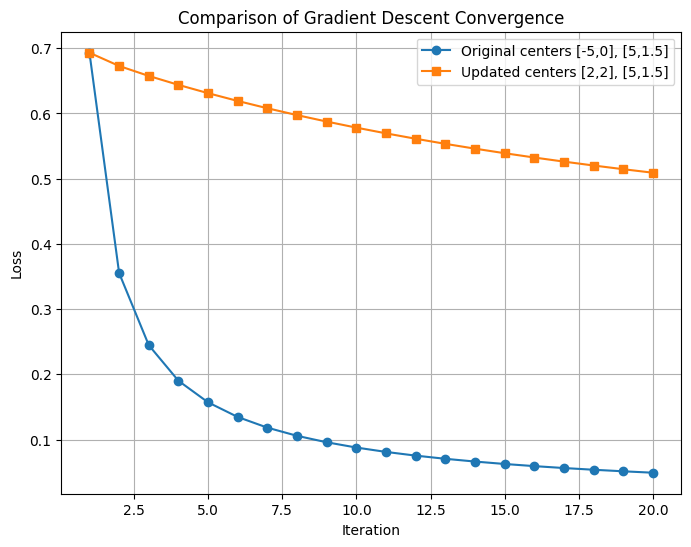

In [63]:
# Batch Gradient Descent
def gradient_descent(X, y, lr=0.1, iterations=20):
    weights = np.zeros(X.shape[1])
    losses = []
    for i in range(iterations):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / y.size
        weights -= lr * gradient
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        print(f"Iteration {i+1}: Loss = {loss:.4f}")
    return weights, losses

# Generate synthetic data for original centers
np.random.seed(0)
centers1 = [[-5, 0], [5, 1.5]]
X1, y1 = make_blobs(n_samples=2000, centers=centers1, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X1 = np.dot(X1, transformation)
X1 = np.c_[np.ones(X1.shape[0]), X1]  # add bias

# Generate synthetic data for updated centers
centers2 = [[2, 2], [5, 1.5]]
X2, y2 = make_blobs(n_samples=2000, centers=centers2, random_state=5)
X2 = np.dot(X2, transformation)
X2 = np.c_[np.ones(X2.shape[0]), X2]  # add bias

# Run gradient descent for both cases
w1, losses1 = gradient_descent(X1, y1, lr=0.1, iterations=20)
w2, losses2 = gradient_descent(X2, y2, lr=0.1, iterations=20)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), losses1, marker='o', label="Original centers [-5,0], [5,1.5]")
plt.plot(range(1, 21), losses2, marker='s', label="Updated centers [2,2], [5,1.5]")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Comparison of Gradient Descent Convergence")
plt.legend()
plt.grid(True)
plt.show()

Iteration 1: Loss = 0.6904
Iteration 2: Loss = 0.1453
Iteration 3: Loss = 0.0528
Iteration 4: Loss = 0.0203
Iteration 5: Loss = 0.0080
Iteration 6: Loss = 0.0032
Iteration 7: Loss = 0.0013
Iteration 8: Loss = 0.0005
Iteration 9: Loss = 0.0002
Iteration 10: Loss = 0.0001
Iteration 11: Loss = 0.0000
Iteration 12: Loss = 0.0000
Iteration 13: Loss = 0.0000
Iteration 14: Loss = 0.0000
Iteration 15: Loss = 0.0000
Iteration 16: Loss = 0.0000
Iteration 17: Loss = 0.0000
Iteration 18: Loss = 0.0000
Iteration 19: Loss = 0.0000
Iteration 20: Loss = 0.0000

Final Weights: [13.23043372  3.63303019]


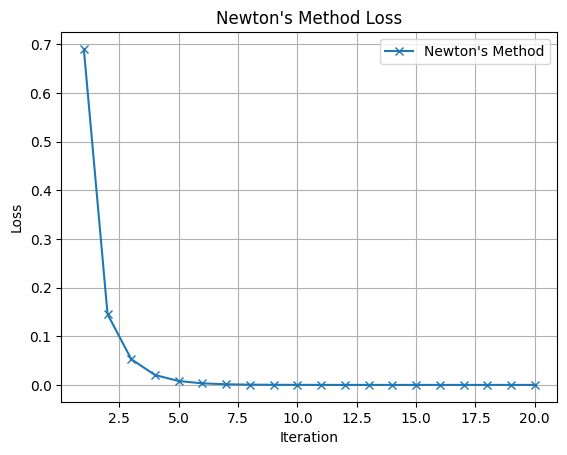

In [58]:

# 3. Newton's Method
np.random.seed(42)
weights_newton = np.random.randn(X.shape[1]) * 0.01
num_iterations = 20
losses_newton = []

for i in range(num_iterations):
    # Predictions
    z = np.dot(X, weights_newton)
    y_pred = sigmoid(z)
    # Gradient
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    # Hessian
    R = np.diag(y_pred * (1 - y_pred))
    H = np.dot(X.T, np.dot(R, X)) / y.size
    # Update rule
    weights_newton -= np.linalg.inv(H).dot(gradient)
    # Track loss
    loss = compute_loss(y, y_pred)
    losses_newton.append(loss)

    print(f"Iteration {i+1}: Loss = {loss:.4f}")

print("\nFinal Weights:", weights_newton)

# -----------------------------
# 4. Plot Loss
# -----------------------------
plt.plot(range(1, num_iterations+1), losses_newton, marker='x', label="Newton's Method")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Newton's Method Loss")
plt.grid(True)
plt.legend()
plt.show()

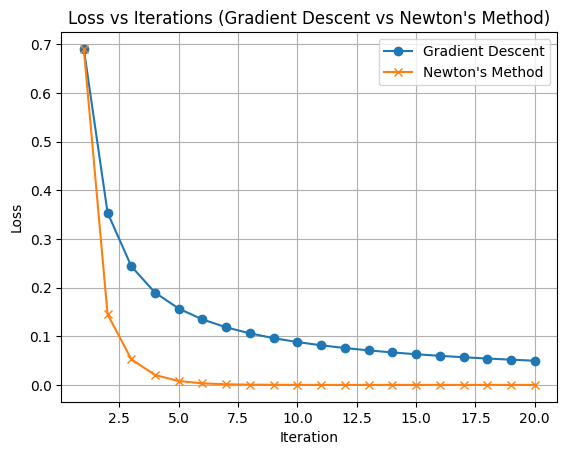

In [59]:
# --------------------------------
# 3. Batch Gradient Descent
# --------------------------------
np.random.seed(42)
weights_gd = np.random.randn(X.shape[1]) * 0.01
lr = 0.1
num_iterations = 20
losses_gd = []

for i in range(num_iterations):
    z = np.dot(X, weights_gd)
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    weights_gd -= lr * gradient
    loss = compute_loss(y, y_pred)
    losses_gd.append(loss)

# --------------------------------
# 4. Newton's Method
# --------------------------------
np.random.seed(42)
weights_newton = np.random.randn(X.shape[1]) * 0.01
losses_newton = []

for i in range(num_iterations):
    z = np.dot(X, weights_newton)
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    R = np.diag(y_pred * (1 - y_pred))
    H = np.dot(X.T, np.dot(R, X)) / y.size
    weights_newton -= np.linalg.inv(H).dot(gradient)
    loss = compute_loss(y, y_pred)
    losses_newton.append(loss)

# --------------------------------
# 5. Plot both
# --------------------------------
plt.plot(range(1, num_iterations + 1), losses_gd, marker='o', label="Gradient Descent")
plt.plot(range(1, num_iterations + 1), losses_newton, marker='x', label="Newton's Method")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs Iterations (Gradient Descent vs Newton's Method)")
plt.legend()
plt.grid(True)
plt.show()